# Context

In this project I will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an advertisement. I'll create a model that will predict whether or not users will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Dataset

[advertising.csv](https://github.com/Sharma-Amol/Predicting_Customer_Ad_Clicks/blob/main/advertising.csv)

# Let's get started.

## Importing relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Geting the Data

In [2]:
ad_data = pd.read_csv('advertising.csv')

In [3]:
# Checking head of dataset.

ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
# To know data types of column values.

ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
# Quick statistical report.

ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [6]:
# To know column labels.

ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [7]:
# Row labels.

ad_data.index

RangeIndex(start=0, stop=1000, step=1)

## Exploratory Data Analysis

Performing EDA using Seaborn for visulaization.

<Figure size 1000x1000 with 0 Axes>

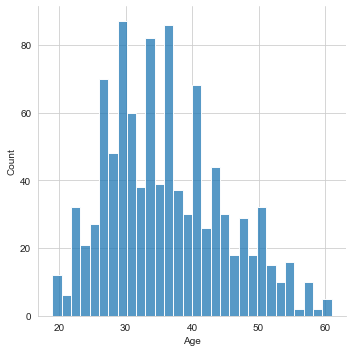

In [8]:
# Creating a histogram of the Age

plt.figure(figsize=(10,10),dpi=100)
sns.set_style('whitegrid')
sns.displot(ad_data['Age'],bins=30)

<Figure size 1000x1000 with 0 Axes>

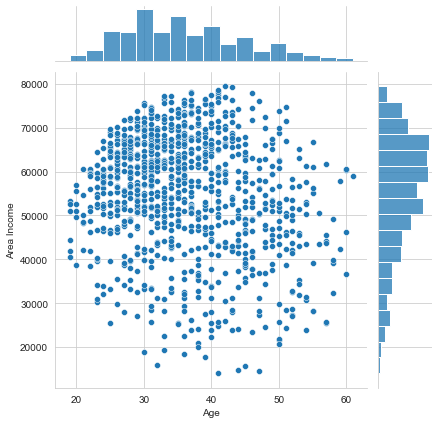

In [9]:
# Creating a jointplot showing Area Income versus Age.

plt.figure(figsize=(10,10),dpi=100)
sns.jointplot(x=ad_data['Age'],y=ad_data['Area Income'])

There is a trend here. One can start earning when he/she get in his/her 20s. As you grow older, your income starts to increase and then, towards retirement, you get no income or starts to drop. Can explore this a little more.

<Figure size 1000x1000 with 0 Axes>

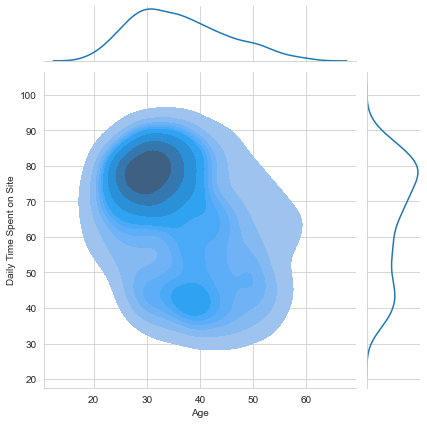

In [10]:
# Creating a jointplot showing the kde distributions of Daily Time spent on site vs. Age.

plt.figure(figsize=(10,10),dpi=100)
sns.jointplot(x=ad_data['Age'],y=ad_data['Daily Time Spent on Site'],kind='kde',shade = True)

<Figure size 1000x1000 with 0 Axes>

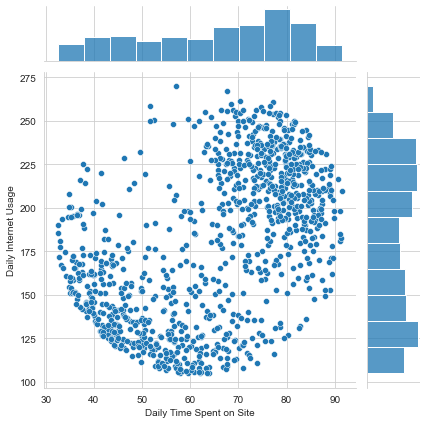

In [11]:
# Creating a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

plt.figure(figsize=(10,10),dpi=100)
sns.jointplot(x=ad_data['Daily Time Spent on Site'],y=ad_data['Daily Internet Usage'])

<Figure size 1000x1000 with 0 Axes>

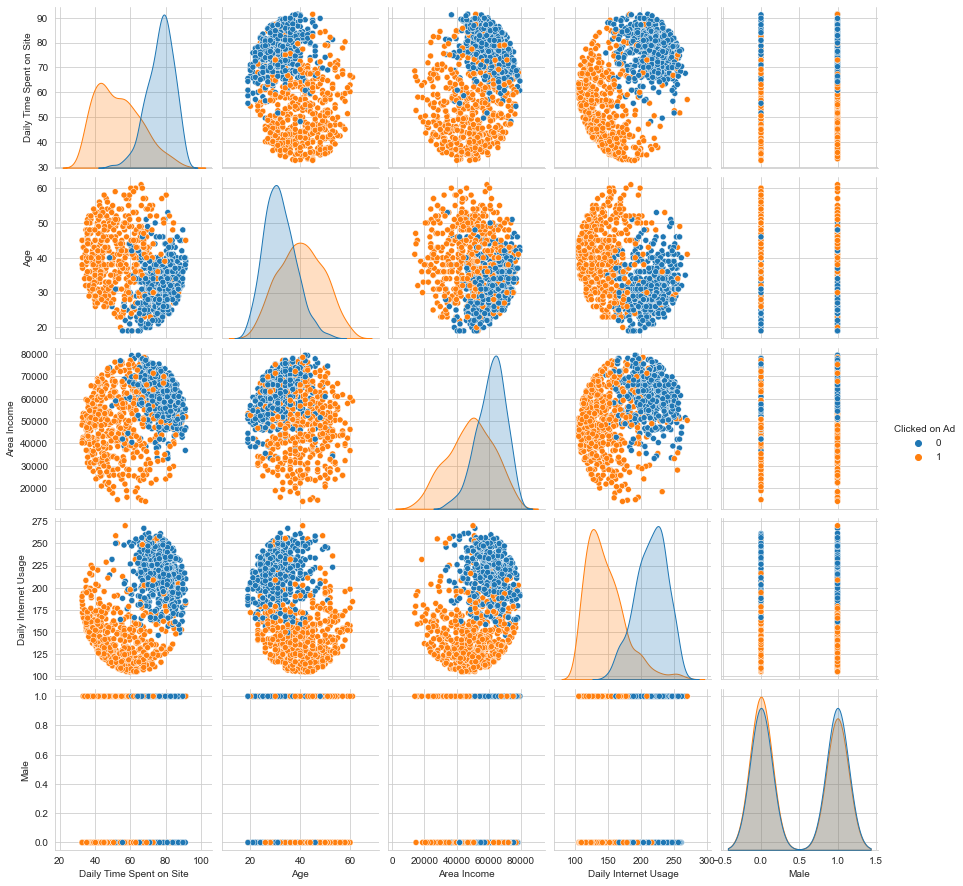

In [12]:
# Finally, creating a pairplot with the hue defined by the 'Clicked on Ad' column feature.

plt.figure(figsize=(10,10),dpi=100)
sns.pairplot(data=ad_data,hue='Clicked on Ad')

<Figure size 1000x1000 with 0 Axes>

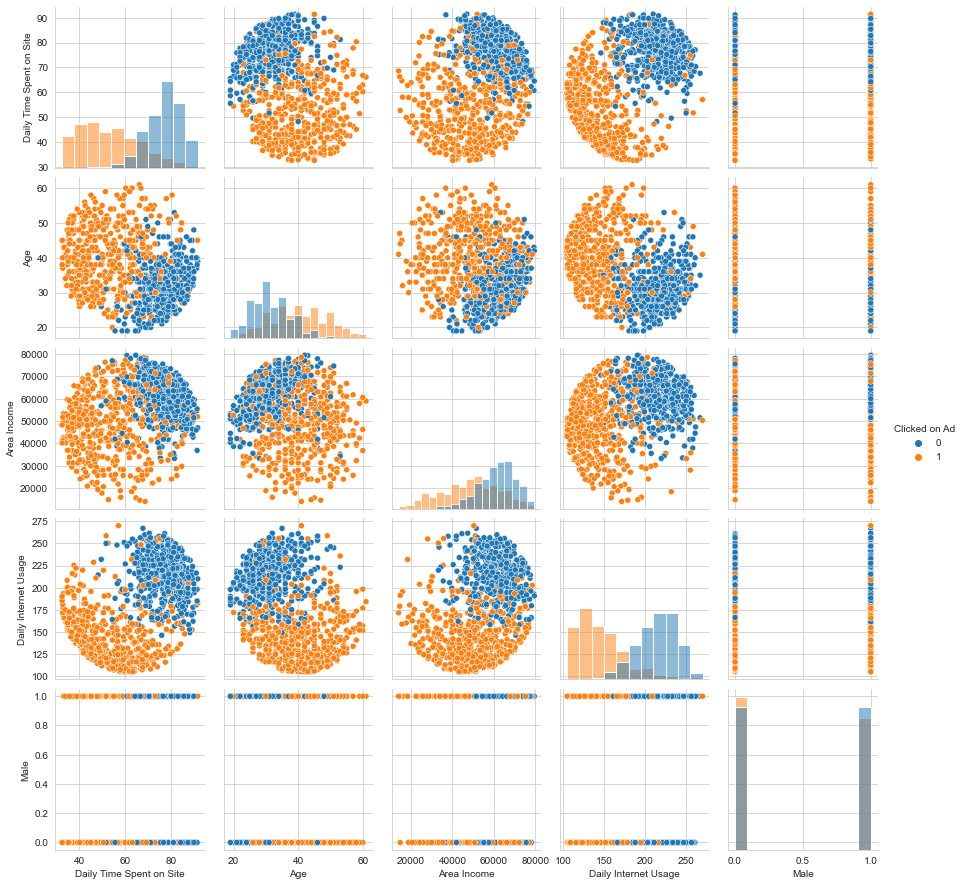

In [13]:
plt.figure(figsize=(10,10),dpi=100)
sns.pairplot(data=ad_data,hue='Clicked on Ad',diag_kind='hist')
plt.savefig("Ad Clicks Pairplot.jpg")

# Logistic Regression

Performing train test split on dataset, and training the model.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

In [16]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
logdata = LogisticRegression()

## Predictions and Evaluations

In [19]:
logdata.fit(X_train,y_train)
predictions = logdata.predict(X_test)

# Creating a classification report for the model.

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print (classification_report(y_test,predictions))
print (confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

[[149   8]
 [ 14 129]]


# Conclusion

sklearn's confusion matrix :-
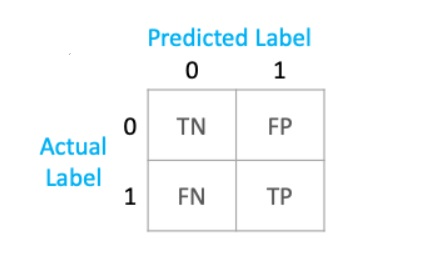

a.) Model is good fit. It has >90% on precision recall and accuracy.

b.) We have some mislabelled points:-

    8 were predicted as positive (1) when they were actually negative (0). 
    
    14 were predicted as negative (0) when they were actually positive (1).
    
    Given the size of dataset, these are acceptable values.